## YİNELEMELİ SİNİR AĞI KATMANLARININ OLUŞTURULMASI

In [ ]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

### Örnek 1: Bir RNN katmanı


In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


### Örnek 2: Boyutlandırılmış RNN katmanı

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


### Örnek 3: Ardışık RNN katmanları

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


 # IMDB VERİ KÜMESİNİ HAZIRLAMAK
 IMDB: Internet Movie Database (Internet Film Veritabanı)

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
num_features = 1000
maxlen = 500
batch_size = 32

In [ ]:
print('Load data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_features)



print(len(input_train), 'Eğitim dizisi', input_train.shape)
print(len(input_test), 'test dizisi', input_test.shape)

Load data..
25000 Eğitim dizisi (25000,)
25000 test dizisi (25000,)


In [ ]:
print('Pad sequnce (sample x train)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)


print(len(input_train), 'Eğitim dizisi', input_train.shape)
print(len(input_test), 'test dizisi', input_test.shape)

Pad sequnce (sample x train)
25000 Eğitim dizisi (25000, 500)
25000 test dizisi (25000, 500)


### EMBEDDING ve SimpleRNN Katmanlarının Eğitilmesi

In [ ]:
from keras.layers import Dense
from keras import layers

### Basit RNN ile Modelleme

In [ ]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


### Basit bir LSTM ile Modelleme

In [ ]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


# Modelin derlenmesi RNN

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6351 - acc: 0.6270 - val_loss: 0.4802 - val_acc: 0.7964
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4656 - acc: 0.7868 - val_loss: 0.4428 - val_acc: 0.8026
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.4076 - acc: 0.8216 - val_loss: 0.4611 - val_acc: 0.7844
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3842 - acc: 0.8343 - val_loss: 0.4037 - val_acc: 0.8334
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3466 - acc: 0.8551 - val_loss: 0.4190 - val_acc: 0.8312
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3319 - acc: 0.8617 - val_loss: 0.5270 - val_acc: 0.7866
Epoch 7/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2962 - acc: 0.8800 - val_loss: 0.4190 - val_acc:

## Modelin Derlenmesi LSTM

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.5584 - acc: 0.7179 - val_loss: 0.4663 - val_acc: 0.7698
Epoch 2/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.4080 - acc: 0.8266 - val_loss: 0.3866 - val_acc: 0.8360
Epoch 3/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.3701 - acc: 0.8432 - val_loss: 0.3754 - val_acc: 0.8366
Epoch 4/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.3505 - acc: 0.8540 - val_loss: 0.3836 - val_acc: 0.8318
Epoch 5/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.3377 - acc: 0.8616 - val_loss: 0.4391 - val_acc: 0.8308
Epoch 6/10
20000/20000 [==============================] - 122s 6ms/step - loss: 0.3312 - acc: 0.8666 - val_loss: 0.3413 - val_acc: 0.8582
Epoch 7/10
20000/20000 [==============================] - 121s 6ms/step - loss: 0.3226 - acc: 0.8665 - val_loss: 0.3890 - v

### SONUÇLARIN ÇİZDİRİLMESİ

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

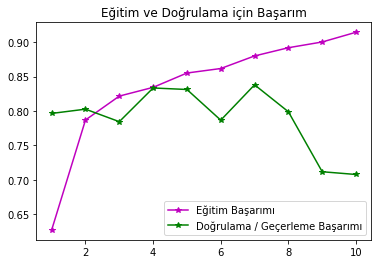

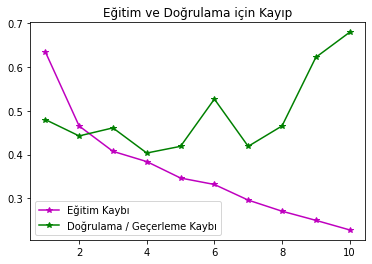

In [ ]:
plt.plot(epochs, acc, 'm*-', label= 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label= 'Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label= 'Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt. legend()

plt.show()

In [ ]:
print(acc, 'eğitim başarımları')

[0.627, 0.78685, 0.8216, 0.8343, 0.85515, 0.8617, 0.88, 0.89195, 0.9003, 0.91445] eğitim başarımları


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

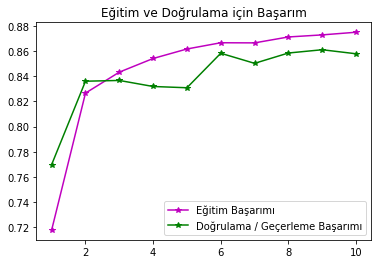

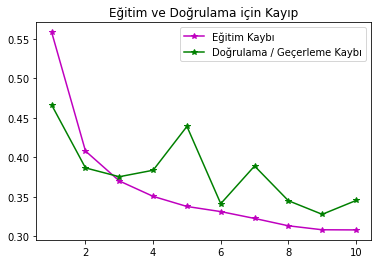

In [ ]:
plt.plot(epochs, acc, 'm*-', label= 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label= 'Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label= 'Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt. legend()

plt.show()